In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# **Logistic Regression**

### Logistic Regression with 2 Features

Create simulated dataset as a normal distribution.

In [2]:
np.random.seed(42)

num_samples = 40

# Class 0 data
x_1 = np.random.multivariate_normal([2, 2], [[1, .75],[.75, 1]], num_samples)
y_1 = np.zeros(num_samples)

# Class 1 data
x_2 = np.random.multivariate_normal([-1, -1], [[1, .75],[.75, 1]], num_samples)
y_2 = np.ones(num_samples)

# Combining the data
X = np.vstack((x_1, x_2))
y = np.hstack((y_1, y_2))

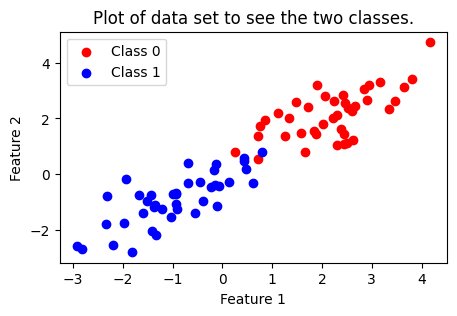

In [3]:
plt.figure(figsize=(5,3))
plt.scatter(x_1[:,0], x_1[:,1], color='red', label='Class 0')
plt.scatter(x_2[:,0], x_2[:,1], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of data set to see the two classes.')
plt.legend()
plt.show()

In [6]:
def initializeTheta(X, random_seed):
  random.seed(random_seed)
  size, features = X.shape
  # num(weight) = num(features) + 1 for bias
  thetaArray = [random.random()*2 - 1 for i in range(features + 1)]

  return np.array(thetaArray)

initializeTheta(X,42)

array([ 0.2788536 , -0.94997849, -0.44994136])

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-1 * z))

def prediction(X, c, m1, m2):
  size, feature = X.shape
  one = np.expand_dims(np.ones(size), 1)
  params = np.array([c, m1, m2])
  train_set = np.column_stack((one, X))
  
  # sigmoid( Linear regression )
  h = sigmoid(np.dot(params, train_set.T))

  return h

In [14]:
thetaArray = initializeTheta(X, 42)
theta0 = thetaArray[0]
theta1 = thetaArray[1]
theta2 = thetaArray[2]
h = prediction(X, theta0, theta1, theta2)
print(X.shape, h.shape)

(80, 2) (80,)


In [17]:
def logLoss(h, y):
  # Binary cross entropy function
  return ((-1. * y * np.log(h)) - ((1. - y) * np.log(1. - h))).mean()

logLoss(h, y)

np.float64(0.19866191835309335)

In [18]:
def gradients(X, y, h):
  s, _ = X.shape
  f = np.column_stack((np.ones(s), X))
  return (1/s) * np.dot(f.T, (h - y))

dThetaArray = gradients(X, y, h)
dThetaArray

array([-0.06877083,  0.09302227,  0.10442537])

In [20]:
def updateTheta(X, thetaArray, dThetaArray, learning_rate):
  return thetaArray - learning_rate*dThetaArray

theta_updated = updateTheta(X, thetaArray, dThetaArray, 0.01)
theta_updated

array([ 0.27954131, -0.95090871, -0.45098562])

In [23]:
def runLogisticRegression_2Features(X, y, iterations, learning_rate):
  thetaArray = initializeTheta(X, 42)
  loss = 0

  for epoch in range(iterations):

    h = prediction(X, thetaArray[0], thetaArray[1], thetaArray[2])
    thetaArray = updateTheta(X, thetaArray, gradients(X, y, h), learning_rate)
    loss = logLoss(h, y)

  return loss, thetaArray

loss, thetaArray = runLogisticRegression_2Features(X, y, 100, 0.01)
print(loss, thetaArray)

0.1792548255021849 [ 0.34627922 -1.03070157 -0.54178807]


In [34]:
def calFeature2Values(x_values, c, m1, m2):
  # theta2 * y = theta1 * x + theta3
  # y = theta1/theta2 * x + theta3 / theta2 --> linear estimation of dataset
  # bound = - theta1/theta2 * x + theta3 / theta2 --> decision boundary
  estiamte = ((m1/m2) * x_values) + (c/m2)
  feature2_val = (-(m1/m2) * x_values) + (c/m2)
  return estiamte, feature2_val

def plotResult2D(x_1, x_2, c, m1, m2):
  plt.figure(figsize=(5,3))
  plt.scatter(x_1[:,0], x_1[:,1], color='red', label='Class 0')
  plt.scatter(x_2[:,0], x_2[:,1], color='blue', label='Class 1')

  # Decision boundary
  x_values = np.linspace(-4, 4, 100)
  estiamte, y_values = calFeature2Values(x_values, c, m1, m2)
  plt.plot(x_values, estiamte, label='estimate', color='orange')
  plt.plot(x_values, y_values, label='Decision', color='green')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Logistic Regression using Gradient Descent')
  plt.legend()
  plt.show()

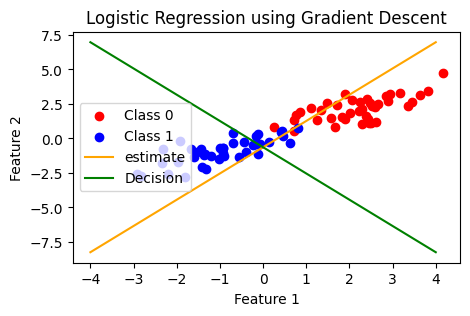

In [35]:
plotResult2D(x_1, x_2, thetaArray[0], thetaArray[1], thetaArray[2])

### Logistic Regression Multiple Features

In [43]:
# Use the same data as before but pad ones to the X matrix
X = np.column_stack((np.ones(X.shape[0]), X))

In [44]:
def initializeTheta_nFeatures(X, random_seed):
  random.seed(random_seed)
  size, features = X.shape
  thetaArray = [random.random()*2 - 1 for i in range(features)]

  return np.array(thetaArray)

thetaArray = initializeTheta_nFeatures(X,42)
thetaArray

array([ 0.2788536 , -0.94997849, -0.44994136])

In [45]:
def prediction_nFeatures(X, thetaArray):
  h = sigmoid(np.dot(thetaArray, X.T))
  return h

h = prediction_nFeatures(X, thetaArray)
h.shape

(80,)

In [46]:
loss = logLoss(h, y)
loss

np.float64(0.19866191835309335)

In [47]:
def gradients_nFeatures(X, y, h):
  return (1/X.shape[0]) * np.dot(X.T, (h - y))

dThetaArray = gradients_nFeatures(X, y, h)
dThetaArray

array([-0.06877083,  0.09302227,  0.10442537])

In [48]:
learning_rate = 0.01
theta_updated = updateTheta(X, thetaArray, dThetaArray, learning_rate)
theta_updated

array([ 0.27954131, -0.95090871, -0.45098562])

In [49]:
def runLogisticRegression_nFeatures(X,y,iterations, learning_rate):
  thetaArray = initializeTheta_nFeatures(X, 42)
  loss = 0

  for epoch in range(iterations):

    h = prediction_nFeatures(X, thetaArray)
    thetaArray = updateTheta(X, thetaArray, gradients_nFeatures(X, y, h), learning_rate)
    loss = logLoss(h, y)

  return loss, thetaArray

loss, thetaArray = runLogisticRegression_nFeatures(X, y, 100, 0.01)
print(loss, thetaArray)

0.1792548255021849 [ 0.34627922 -1.03070157 -0.54178807]


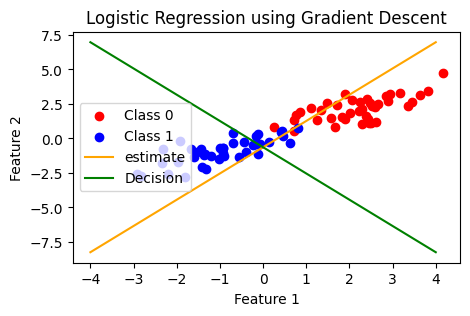

In [50]:
plotResult2D(x_1, x_2, thetaArray[0], thetaArray[1], thetaArray[2])

### Logistic Regression with Advertisment Click Binary Classification

In [52]:
df = pd.read_csv('advertising.csv')
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
549,73.89,35,70495.64,229.99,Multi-channeled asymmetric installation,Dustinborough,1,Somalia,2016-06-26 17:25:55,0
488,35.49,48,43974.49,159.77,Fully-configurable holistic throughput,Timothyport,0,American Samoa,2016-04-08 14:35:44,1
244,70.44,24,65280.16,178.75,Polarized attitude-oriented superstructure,New Sonialand,1,Algeria,2016-06-06 21:26:51,0
553,44.73,35,55316.97,127.56,Object-based neutral policy,North Lauraland,1,Guam,2016-01-27 18:25:42,1
269,79.15,26,62312.23,203.23,Intuitive explicit conglomeration,Port Robin,0,Greenland,2016-01-20 19:09:37,0


In [53]:
def normalize(df_column):
  stat = df_column.describe()
  name = stat.columns.item()
  norm = (df_column.to_numpy() - stat[name]['mean']) / stat[name]['std']

  return norm

In [54]:
df[['Daily Time Spent on Site']] = normalize( df[['Daily Time Spent on Site']] )
df[['Age']] = normalize( df[['Age']] )
df[['Area Income']] = normalize( df[['Area Income']] )
df[['Daily Internet Usage']] = normalize( df[['Daily Internet Usage']] )

assert df['Daily Time Spent on Site'].std() == 1
assert df['Age'].std() == 1
assert df['Area Income'].std() == 1
assert df['Daily Internet Usage'].std() == 1

In [91]:
from sklearn.model_selection import train_test_split

y = df[['Clicked on Ad']]
X = df.drop(columns = ['Clicked on Ad', 'Male', 'City', 'Ad Topic Line', 'Country', 'Timestamp'])

# Split the data into training and testing sets
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df_X_train.to_numpy()
y = df_y_train.to_numpy().squeeze(1)

In [92]:
X = np.hstack((np.ones(( len(X), 1)), X))

In [93]:
learning_rate = 5e-3
iterations = 250
loss, thetaArray = runLogisticRegression_nFeatures(X, y, iterations, learning_rate)

In [94]:
h = prediction_nFeatures(X, thetaArray)

In [95]:
def accuracy(h,y):
  thres = np.where(h >= 0.5, 1, 0)
  n = 0
  for i in range(len(thres)):
    if thres[i] == y[i]:
      n += 1

  return n/len(thres)

In [96]:
# verify that accuracy function is correct
h_temp = np.array([ 0.2, 0.4, 0.5, 0.6, 0.8, 0.9])
y_temp =  np.array([ 0, 0, 1, 0, 1, 0])
assert accuracy(h_temp, y_temp) == 2/3

In [97]:
accuracy(h,y)

0.8575

Apply model on test data set and find the accuracy.

In [98]:
X = df_X_test.to_numpy()
y = df_y_test.to_numpy()

In [99]:
X = np.hstack((np.ones(( len(X), 1)), X))

h = prediction_nFeatures(X, thetaArray)

loss = logLoss(h,y)
loss

np.float64(0.9014565000568766)

In [100]:
accuracy(h,y)

0.845